# 6.13.5. El ensayo brasilero o el ensayo de tracción indirecta

Cuaderno elaborado con la ayuda de:
* Juan Manuel Hernández Álvarez

In [1]:
from sympy import init_printing, latex, symbols, pi, simplify, lambdify, sqrt

# Para imprimir bonito
init_printing()
from IPython.display import Math                 
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

Calculemos la distribución del esfuerzo en un cilindro sujeto a un par de fuerzas, diametralmente opuestas, uniformes y lineales, como se ilustra en la figura siguiente; ambas fuerzas tienen magnitud $P$ y actúan en sentido contrario.

<img src="brasilero1.png" width="800">

Para intentar calcular la distribución de esfuerzos en ese cilindro, utilicemos como base la solución al problema de Flamant; para tal fin, se aplicará el principio de superposición para sumar los esfuerzos producidos por un par de fuerzas uniformemente distribuidas y diametralmente opuestas. Intentemos, inicialmente, sumar las contribuciones a los esfuerzos de las dos soluciones de Flamant mostradas a continuación:

<img src="brasilero2.png" width="800">

Según el problema de Flamant, la distribución de esfuerzos sobre la circunferencia punteada mostrada:

<img src="Flamant3.png" width="800">

está dada por las ecuaciones
\begin{align}
\sigma_r &= - \frac{2 P}{\pi r} \sin\theta = -\frac{2 P}{\pi d} &
\sigma_\theta &= 0 & 
\tau_{r\theta} &= 0
\end{align}
las cuales representan una distribución radial de esfuerzo.

Dichas ecuaciones se pueden representar en el plano cartesiano por:
\begin{align}
	\sigma_x  &= -\frac{2 P x^2 y}{\pi (x^2 + y^2)^2} &
	\sigma_y  &= -\frac{2 P y^3}{\pi (x^2 + y^2)^2} &
	\tau_{xy} &= -\frac{2 P x y^2}{\pi (x^2 + y^2)^2}.
\end{align}

In [2]:
# Esfuerzos asociados a la solución de Flamant
esf_sx  = lambda x, y, P : -2*P*x**2*y/(pi*(x**2 + y**2)**2)
esf_sy  = lambda x, y, P : -2*P*y**3  /(pi*(x**2 + y**2)**2)
esf_txy = lambda x, y, P : -2*P*x*y**2/(pi*(x**2 + y**2)**2)

Con referencia a la figura siguiente:

<img src="brasilero3.png" width="800">

de aquí se deduce que la carga $P_1$ produce el esfuerzo a compresión $\frac{2 P_1}{\pi d}$ y la carga $P_2$ produce el esfuerzo a compresión $\frac{2 P_2}{\pi d}$ sobre cualquier punto de la circunferencia. Como no existen esfuerzos cortantes sobre el diferencial y solo existen los esfuerzos normales $-\frac{2 P_1}{\pi d}$ y $-\frac{2 P_2}{\pi d}$, como según el teorema de Thales un ángulo inscrito a lo largo del diámetro de un círculo es siempre un ángulo recto, y como $P_1 = P_2 = P$, tenemos que sobre todos los puntos de la circunferencia existe una distribución hidrostáticos de esfuerzos a compresión $\frac{2 P}{\pi d}$, y en consecuencia, en todos los puntos de la circunferencia de radio $d$ se tiene que $\sigma_x = \sigma_y = -\frac{2 P}{\pi d}$. Por lo tanto, si que quiere eliminar esa componente hidrostática es necesario sumarle a las soluciones de Flamant la distribución radial de esfuerzo de tracción de magnitud $\frac{2 P}{\pi d}$ que se muestra en la Figura 6.29.

Debemos ahora materializar con una ecuación la sumatoria de esfuerzos esbozada en la Figura 6.29, que aplica el principio de superposición. Según la Figura 6.30, existen tres sistemas de coordenadas: el sistema de coordenadas 1 asociado a la solución de Flamant 1, el sistema de coordenadas 2 asociado a la solución de Flamant 2 y un sistema de coordenadas global $(x,y)$ cuyo origen se sitúa en el centro de la circunferencia.

A partir de la figura siguiente:

<img src="brasilero4.png" width="800">

se deduce que la relación entre los sistemas de coordenadas 1 y 2 y el sistema de coordenadas global $(x,y)$ está dado por:
\begin{align}
	x_1 &= -x & y_1 &= \frac{d}{2} - y \label{eq:x1y1_brasilero}\\
	x_2 &= x  & y_2 &= \frac{d}{2} + y \label{eq:x2y2_brasilero}
\end{align}

In [3]:
P = symbols('P')
x, y, x1, y1, x2, y2 = symbols('x y x1 y1 x2 y2')
r1, r2, d = symbols('r1 r2 d', nonnegative=True)   # r1>=0, r2>=0

#x1 = -x;     y1 = d/2 - y
#x2 =  x;     y2 = d/2 + y

De este modo, al aplicar las ecuaciones anteriores obtenemos, por ejemplo, para $\sigma_x$ que 
\begin{equation}
	\sigma_x = \underbrace{\left(-\frac{2 P x_1^2 y_1}{\pi (x_1^2 + y_1^2)^2}\right)}_{\text{solución Flamant 1}} + \underbrace{\left(-\frac{2 P x_2^2 y_2}{\pi (x_2^2 + y_2^2)^2}\right)}_{\text{solución Flamant 2}} + \underbrace{\frac{2 P}{\pi d}\vphantom{\left(-\frac{x_1^2}{x_1^2}\right)}}_{\text{esfuerzo radial}}
\end{equation}
un procedimiento similar se realiza para calcular $\sigma_y$ y $\tau_{xy}$.

In [4]:
# esfuerzos asociados a la solución de Flamant 1
sx1  = esf_sx (x1, y1, P)
sy1  = esf_sy (x1, y1, P)
txy1 = esf_txy(x1, y1, P)

# esfuerzos asociados a la solución de Flamant 2
sx2  = esf_sx (x2, y2, P)
sy2  = esf_sy (x2, y2, P)
txy2 = esf_txy(x2, y2, P)

# esfuerzos asociados al esfuerzo radial mostrado en la Figura 6.29
sx3  = 2*P/(pi*d)
sy3  = 2*P/(pi*d)
txy3 = 0

# se aplica el principio de superposición
sx  = simplify(sx1  + sx2  + sx3 ).collect(2*P/pi)
sy  = simplify(sy1  + sy2  + sy3 ).collect(2*P/pi)
txy = simplify(txy1 + txy2 + txy3).collect(2*P/pi)

In [5]:
imprimir(r'\sigma_x(r,\theta) = ', sx)

<IPython.core.display.Math object>

In [6]:
imprimir(r'\sigma_y(r,\theta) = ', sy)

<IPython.core.display.Math object>

In [7]:
imprimir(r'\tau_{xy}(r,\theta) = ', txy)

<IPython.core.display.Math object>

In [8]:
sx  = sx.subs ({x1**2+y1**2:r1**2, x2**2+y2**2:r2**2, x1:-x, x2:x})
sy  = sy.subs ({x1**2+y1**2:r1**2, x2**2+y2**2:r2**2, x1:-x, x2:x})
txy = txy.subs({x1**2+y1**2:r1**2, x2**2+y2**2:r2**2, x1:-x, x2:x}).collect(x)

In [9]:
imprimir(r'\sigma_x(r,\theta) = ', sx)

<IPython.core.display.Math object>

In [10]:
imprimir(r'\sigma_y(r,\theta) = ', sy)

<IPython.core.display.Math object>

In [11]:
imprimir(r'\tau_{xy}(r,\theta) = ', txy)

<IPython.core.display.Math object>

En el caso de que $x=0$ se tiene que $r_1 = y_1$ y $r_2 = y_2$ y, por lo tanto,
\begin{align}
    \sigma_x &= 
    \frac{2 P}{\pi d} &
    \sigma_y &= \frac{2 P}{\pi} \left[\frac{1}{d} - \frac{1}{y_1} - \frac{1}{y_2}  \right] &
    \tau_{xy} &= 0;
\end{align}

In [12]:
sx.subs({x:0, r1:y1, r2:y2})

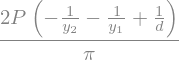

In [13]:
sy.subs({x:0, r1:y1, r2:y2})

In [14]:
txy.subs({x:0, r1:y1, r2:y2})

De otro lado, en el caso de que $y=0$ se tiene que $y_1 = y_2 = \frac{d}{2}$ y $r_1 = r_2 = \sqrt{x^2 + \frac{d^2}{4}}$ y, en consecuencia,
\begin{align}
    \sigma_x &= 
    \frac{2 P}{\pi} \left[\frac{1}{d} - \frac{x^2 d}{\left(x^2 + \frac{d^2}{4}\right)^2} \right] &
    \sigma_y &= \frac{2 P}{\pi} \left[\frac{1}{d} - \frac{d^3}{4\left(x^2 + \frac{d^2}{4}\right)^2} \right] &
    \tau_{xy} &= 0.
\end{align}

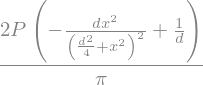

In [15]:
sx.subs({y:0, y1:d/2, y2:d/2, r1:sqrt(x**2 + d**2/4), r2:sqrt(x**2 + d**2/4)}).collect(2*P/pi)

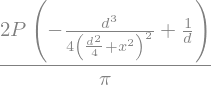

In [16]:
sy.subs({y:0, y1:d/2, y2:d/2, r1:sqrt(x**2 + d**2/4), r2:sqrt(x**2 + d**2/4)}).collect(2*P/pi)

In [17]:
txy.subs({y:0, y1:d/2, y2:d/2, r1:sqrt(x**2 + d**2/4), r2:sqrt(x**2 + d**2/4)}).collect(2*P/pi)

En particular, observe que los esfuerzos $\sigma_x$ son máximos, constantes e iguales a $\frac{2 P}{\pi d}$ en $x=0$, que es el plano sobre el cual se están aplicando las cargas. Este es el hecho que se utiliza en el ensayo brasilero para la determinación, de forma indirecta, del esfuerzo máximo a tracción que puede soportar el material.

## Graficando los esfuerzos

In [18]:
# Se convierten los esfuerzos de sympy a numpy
esf_sx  = lambdify([x, y1, y2, r1, r2, d, P], sx)
esf_sy  = lambdify([x, y1, y2, r1, r2, d, P], sy)
esf_txy = lambdify([x, y1, y2, r1, r2, d, P], txy)

A partir de las ecuaciones anteriores se puede utilizar el siguiente código para mostrar la distribución de esfuerzos dentro del cilindro:

In [19]:
import numpy as np

# se define la carga y el diámetro del cilindro
P = 1  # carga unitaria
d = 1  # diámetro unitario

# se calculan los x, y a partir de las coordenadas polares
rr = np.linspace(0, d/2, 50)
tt = np.linspace(0, 2*np.pi, 181)

r, t = np.meshgrid(rr, tt)

# se hace la conversión de coordenadas polares a rectangulares
x, y = r*np.cos(t), r*np.sin(t)

# se calculan las coordenadas en los otros sistemas
y1 = d/2 - y;          r1 = np.hypot(x, y1)
y2 = d/2 + y;          r2 = np.hypot(x, y2)

# se calculan los esfuerzos sx, sy y txy
sx  = esf_sx (x, y1, y2, r1, r2, d, P)
sy  = esf_sy (x, y1, y2, r1, r2, d, P)
txy = esf_txy(x, y1, y2, r1, r2, d, P)

# se calculan el esfuerzo cortante máximo y los esfuerzos principales
tmax = np.hypot((sx - sy)/2, txy)
s1 = (sx + sy)/2 + tmax;           t1 = np.arctan2(2*txy, sx-sy)/2
s2 = (sx + sy)/2 - tmax;           t2 = t1 + np.pi/2

In [20]:
import matplotlib.pyplot as plt

# se define la función con la que se generan los gráficos
def dibujar_esf(titulo, x, y, var, nc):
    fig, ax = plt.subplots()
    ax.plot(x[:, -1], y[:, -1], 'k-')                # se grafica la circunferencia
    contour = ax.contour(x, y, var, nc, cmap='jet')  # se crean "nc" curvas de contorno
    ax.set_title(titulo)                             # título del gráfico
    ax.set_xlabel('Distancia $x$ (adimensional)')
    ax.set_ylabel('Distancia $y$ (adimensional)')
    ax.axis('equal')                                 # ejes iguales
    fig.colorbar(contour, orientation='horizontal')  # barra de colores abajo
    plt.show()

A continuación, se muestra la variación de los esfuerzos principales $\left(\sigma_1\right)_{xy}$ y $\left(\sigma_2\right)_{xy}$ y del esfuerzo cortante máximo $\left(\tau_{\max}\right)_{xy}$ en el cilindro. En particular, observe que los esfuerzos $\sigma_1$ son máximos en $x=0$; adicionalmente los gráficos de $\sigma_2$ y $\tau_{\max}$ muestran unas concentraciones de esfuerzo justo en el lugar donde se aplican las cargas; estos son, de hecho, puntos de singularidad.

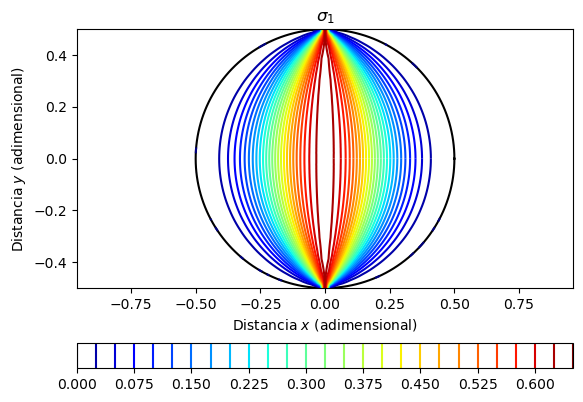

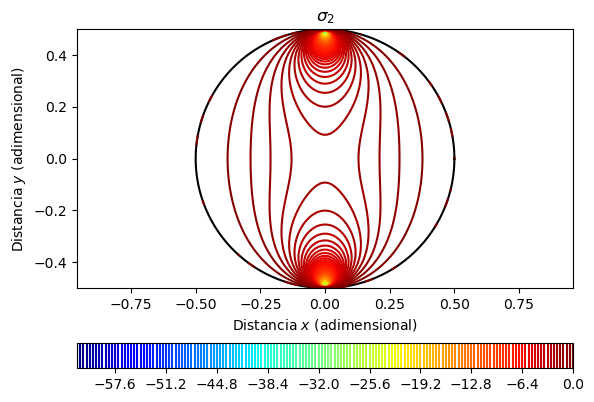

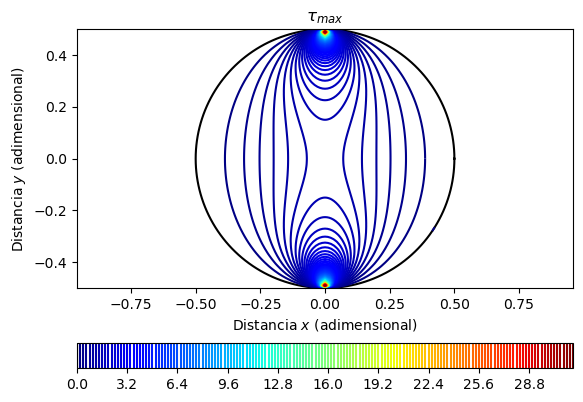

In [21]:
# se grafican los esfuerzos
dibujar_esf(r'$\sigma_1$',   x, y, s1, 25)
dibujar_esf(r'$\sigma_2$',   x, y, s2, 200)
dibujar_esf(r'$\tau_{max}$', x, y, tmax, 200)

Comparemos el anterior resultado con el obtenido mediante el método fotoelástico:

<img src="brasilero5.png" width="800">

Imagen tomada de:
> L. V. Stepanova, V. S. Dolgikh and V. A. Turkova. Digital photoelasticity for calculating coefficients of the Williams series expansion in plate with two collinear cracks under mixed mode loading. Information Technology and Nanotechnology, January 2017. https://ceur-ws.org/Vol-1904/paper35.pdf

### Trayectorias de los esfuerzos principales

In [22]:
def dibujar_trayectoria_s1_s2():  
    # se define la carga y el diámetro del cilindro
    P = 1  # carga unitaria
    d = 1  # diámetro unitario

    # se calculan los x, y a partir de las coordenadas polares
    rr = np.linspace(0, d/2, 10)
    tt = np.linspace(0, 2*np.pi, 37)

    r, t = np.meshgrid(rr, tt)

    # se hace la conversión de coordenadas polares a rectangulares
    x, y = r*np.cos(t), r*np.sin(t)

    # se calculan las coordenadas en los otros sistemas
    y1 = d/2 - y;          r1 = np.hypot(x, y1)
    y2 = d/2 + y;          r2 = np.hypot(x, y2)

    # se calculan los esfuerzos sx, sy y txy
    sx  = esf_sx (x, y1, y2, r1, r2, d, P)
    sy  = esf_sy (x, y1, y2, r1, r2, d, P)
    txy = esf_txy(x, y1, y2, r1, r2, d, P)

    # se calculan el esfuerzo cortante máximo y los esfuerzos principales
    t1 = np.arctan2(2*txy, sx-sy)/2
    t2 = t1 + np.pi/2    
    
    fig, ax = plt.subplots()
    esc = 0.03
    h1 = ax.quiver(x, y,  np.cos(t1),  np.sin(t1), scale=1/esc, color='b')
    h2 = ax.quiver(x, y, -np.cos(t1), -np.sin(t1), scale=1/esc, color='b')
    h3 = ax.quiver(x, y,  np.cos(t2),  np.sin(t2), scale=1/esc, color='r', headwidth=0, headlength=0)
    h4 = ax.quiver(x, y, -np.cos(t2), -np.sin(t2), scale=1/esc, color='r', headwidth=0, headlength=0)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-0.5, 0.5)
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.legend([h1, h3],['Dirección de $\sigma_1$', 'Dirección de $\sigma_2$'], loc='lower right')
    plt.show()

La figura siguiente muestran las trayectorias de los esfuerzos principales:

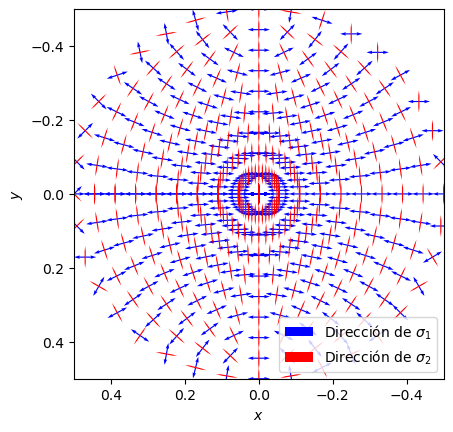

In [23]:
dibujar_trayectoria_s1_s2()